# K-Means Clustering
Uno de los algoritmos más simples que se pueden implementar para resolver un problema de agrupamiento es el llamado algoritmo *k-means*. Su objetivo es particionar un conjunto de datos *N*-dimensional en *k* conjuntos diferentes, cuyo número se fija al inicio del proceso. El algoritmo realiza un clustering completo del conjunto de datos, es decir, cada punto de datos considerado pertenecerá exactamente a uno de los *k* clusters.

La parte más importante del proceso es determinar las particiones que forman los *k* conjuntos. Esto se hace definiendo k centroides iniciales y asignando cada punto de datos al grupo con el centroide más cercano. Luego, el centroide se actualiza tomando la media de los puntos de datos en el grupo.

Otras dos cosas importantes a considerar son las siguientes:

* **Diferentes k centroides conducen a resultados diferentes**: los $k$ centroides iniciales se establecen al comienzo del proceso y diferentes ubicaciones pueden conducir a resultados diferentes.

* **Las particiones no son invariantes de escala**: las particiones no son invariantes de escala y, por lo tanto, el mismo conjunto de datos puede generar resultados muy diferentes según la escala y las unidades utilizadas. Por ejemplo, la siguiente figura muestra dos representaciones de un mismo conjunto de datos utilizando dos escalas.


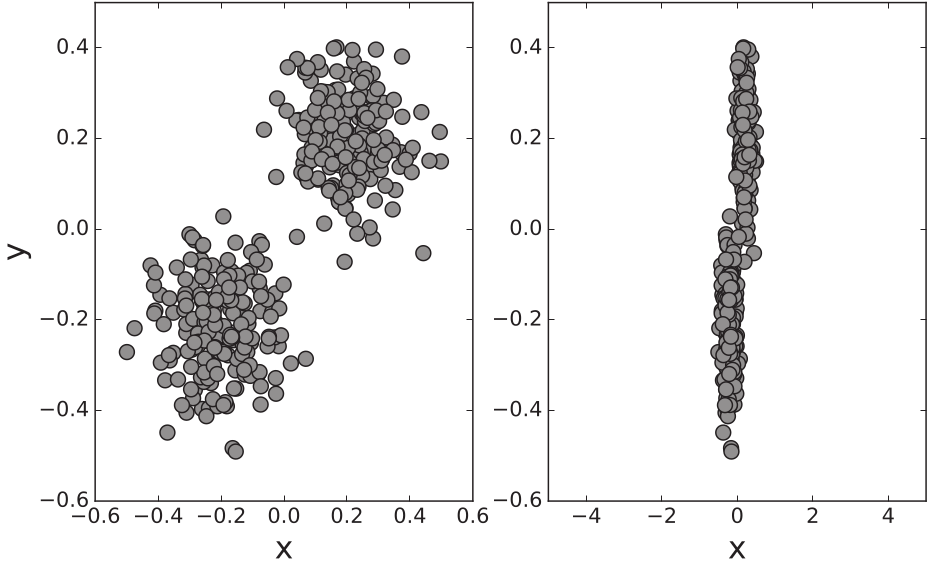

## Funcionamiento
La idea general detrás de *k-means* se puede resumir en los siguientes cuatro pasos:
1. Elija la ubicación de los $k$ centroides iniciales.
2. Para cada punto de datos $x_i$, encuentre la distancia a cada uno de los $c_j, j=1,...,k$ centroides y asigne el punto al más cercano. La **distancia euclidiana** $d(x, c_j )$ es comunmente utilizada.
3. Una vez que todos los puntos de datos hayan sido asignados a un grupo, vuelva a calcular las posiciones de los centroides.
4. Repita los pasos 2 y 3 hasta que se alcance la convergencia, es decir, que no existan nuevas reasignaciones de clusters. Opcionalmente puedes utilizar otros criterios de paro como número máximo de iteraciones.

El paso 1 anterior requiere que elijamos los centroides iniciales y existen varias posibilidades para ello. Se pueden elegir las posiciones al azar (parámetro de inicialización `random`). Ten en cuenta que una elección aleatoria puede conducir a un comportamiento divergente.

También podemos comenzar con un centroide global y elegir puntos a una distancia máxima de él (consulta parámetro de inicialización `kmeans++`). Una buena alternativa es utilizar múltiples condiciones iniciales aleatorias en varios ensayos de agrupamiento.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Cargamos el conjunto de datos
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# Generamos nuestros datos X con Annual income y Spending score
X = df.iloc[:, [3,4]].values

Nos quedamos con las variables de *Annual income* y *Spending Score* de nuestro *DataFrame* para más adelante graficar en 2D.

IMPORTANTE: Esto no es necesario, de hecho, comunmente utilizarás todas o la mayoría de las características. Aquí seleccionamos 2 de ellas para facilitar la demostración con una gráfica.

In [3]:
from sklearn.cluster import KMeans # importamos KMeans

km1 = KMeans(n_clusters = 1, init='k-means++') # Crear el modelo
km1.fit(X) # ajuste sus parametros (aprendizaje) con respecto a X
print(km1.inertia_) # Sum of squared distances to the closest centroid
# Mas pequeño el valor, mas cercanos entre si --> clusters mas compactos

269981.28


## Inercia
Como es el caso con muchos algoritmos, *k-means* tiene como objetivo minimizar una **función objetivo**. La optimización de esta función objetivo nos permite saber qué tan bien se está desempeñando nuestra tarea de agrupación.

Una función objetivo típica es una función de error al cuadrado que viene dada por su *Suma de Errores al Cuadrado* (*Sum of Squared Errors: SSE*), también conocida como **inercia**:

$SSE=\sum_{j=1}^{k}\sum_{i=1}^{N}(x_{ij} - c_j)^2$

Donde:
* $N$ es el número total de patrones (datos)
* $k$ es el número de clusters
* $c_j$ es el centroide del cluster $j$
* $x_{ij}$ es el patrón $i$ asignado al cluster $j$


## Elbow method
El **método del codo** es una técnica utilizada para validar los resultados de clustering obtenidos mediante el algoritmo *k-means*. Este método ayuda a determinar el número óptimo de clusters para un conjunto de datos.

La idea principal detrás del método del codo es calcular la **suma de los cuadrados de las distancias** entre los puntos de datos y los centroides de los clusters a los que han sido asignados (i.e., inercia) a medida que aumenta el número de clusters. Luego, se busca el punto en el gráfico donde la disminución en la suma de cuadrados se vuelve significativamente más lenta, formando lo que se asemeja a un "codo".

Para aplicar el método del codo, se realiza el clustering con diferentes valores de $k$ (número de clusters) y se calcula la **inercia** para cada valor de $k$. Luego, se grafica la suma de cuadrados en función de $k$. El punto en el gráfico donde se observa un cambio significativo en la pendiente, o donde la curva comienza a aplanarse, se considera como el número óptimo de clusters.

A continuación, veamos como implementar el método del codo para nuestro dataset usando una gráfica de línea.

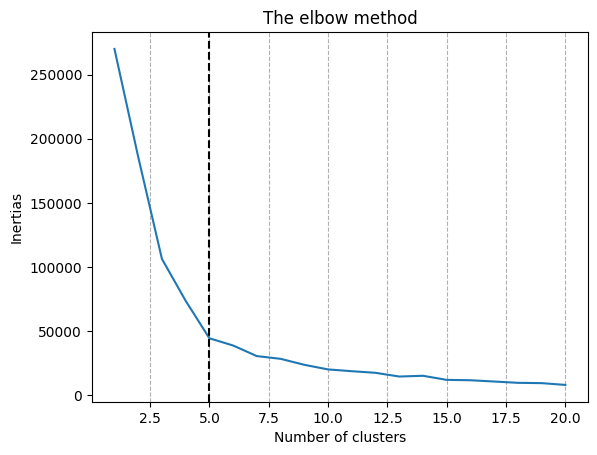

In [4]:
# Elbow method: para evaluar el k óptimo
inertias = []
for i in range(1, 21):
  km = KMeans(n_clusters = i, init='k-means++')
  km.fit(X)
  inertias.append(km.inertia_)

# Grafica de las inercias: suma de distancias al cuadrado
plt.plot(range(1,21), inertias)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.axvline(5, color='k', linestyle='--')
plt.grid(axis='x', linestyle='--')
plt.show()

`inertia`: mean squared distance between each instance and its closest centroid.

En la gráfica observamos que la disminución en la suma de las distancias se atenúa cuando el número de clusters (*k*) es igual a 5, por lo que, para este caso práctico, el número óptimo de clusters será de 5.

In [5]:
# Creamos el K-means para los 5 clusters encontrados

km = KMeans(n_clusters=5, init='k-means++') # kmeans++: acelera la convergencia
y_kmeans = km.fit_predict(X)
y_kmeans

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2,
       4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 2, 0, 3, 0, 3, 0,
       2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)

Ahora analizemos los centroides de los 5 clusters donde los valores representan el "promedio" de las características *Annual income* y *Spending score* para cada cluster.

In [6]:
km.cluster_centers_

array([[86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

Para poder observar gráficamente la asignación de los clientes a los 5 "perfiles" (clusters) realizamos los siguiente:

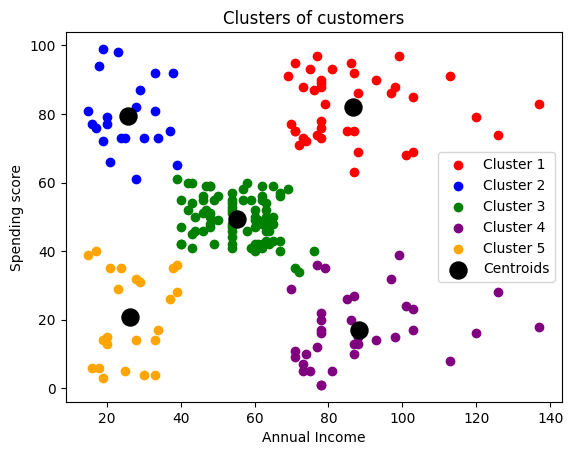

In [7]:
# Visualización de los clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], c = 'purple', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], c = 'orange', label='Cluster 5')

# Incluir los centroides
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=150, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.legend()
plt.show()

## Indicando centroides iniciales de forma explicita
Deberías especificar los centroides iniciales en el algoritmo k-means cuando tengas conocimiento previo sobre la distribución de tus datos o cuando quieras influir en el resultado del clustering de alguna manera específica.

Especificar los centroides iniciales te permite iniciar el algoritmo con centroides predefinidos en lugar de utilizar una inicialización aleatoria. Esto puede ser útil en situaciones donde tengas información previa sobre la ubicación esperada de los centroides o cuando desees comparar el rendimiento del algoritmo con diferentes configuraciones iniciales.

Algunos escenarios en los que podrías querer especificar los centroides iniciales incluyen:
1. Cuando tienes conocimiento experto sobre el dominio y quieres inicializar los centroides en ubicaciones específicas que reflejen ese conocimiento.
2. Cuando estás utilizando k-means en un contexto de aprendizaje semi-supervisado y quieres inicializar los centroides con información de etiquetas conocidas.
3. Cuando estás realizando experimentos para comparar diferentes inicializaciones y sus efectos en los resultados del clustering.

A continuación, especificamos 5 centroides iniciales usando el argumento `init`.

In [8]:
centr_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1,2], [0,2]])
km = KMeans(n_clusters=5, init=centr_init)

y_kmeans = km.fit_predict(X)
km.cluster_centers_

array([[ 25.72727273,  79.36363636],
       [114.71428571,  78.42857143],
       [ 87.        ,  18.63157895],
       [ 80.375     ,  82.9375    ],
       [ 48.16831683,  43.3960396 ]])

# Validación de modelos de clustering
La validación del cluster es una parte importante del proceso para determinar la efectividad de la solución de clustering. Se puede utilizar además para identificar clusters que deben dividirse o fusionarse, o para identificar puntos individuales con un efecto desproporcionado en el agrupamiento general.

Esto se puede hacer con la ayuda de dos medidas: **cohesión** y **separación**.
1. La **cohesión** es una medida de qué tan estrechamente relacionados están los puntos de datos dentro de un grupo y viene dada por el SSE dentro del grupo (*within-cluster SSE*):

$C(c_j)=\sum_{x\in C_j}d(x,c_j)^2$

2. La **separación** es una medida de qué tan bien se segregan los clústeres entre sí:

$S(c_i, c_j)=d(c_i,c_j)^2$

La siguiente imagen ilustra los conceptos para validación de clusters:
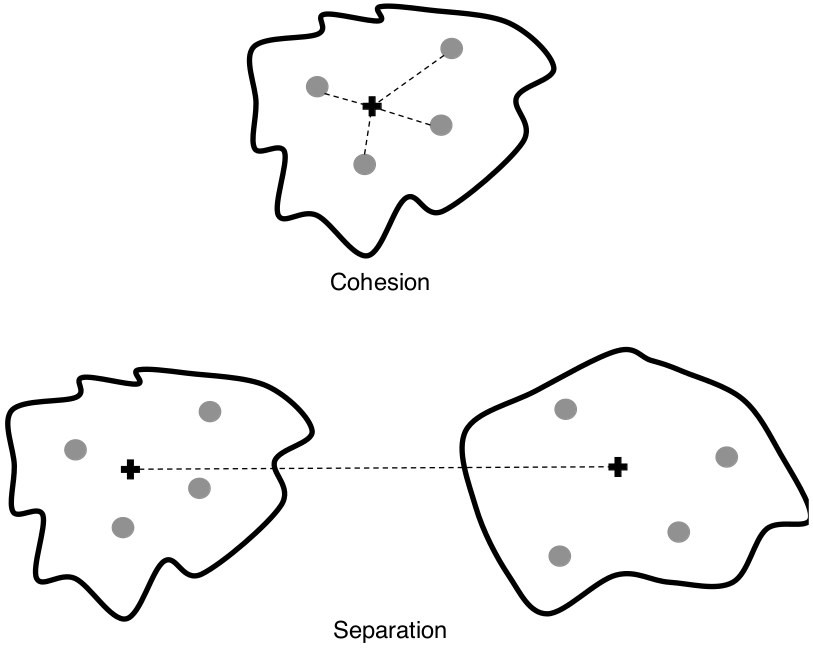

## Silhouette
Una medida alternativa de validez que nos proporciona una combinación de las ideas detrás de la cohesión y la separación en un solo coeficiente llamado (puntuación de silueta) silhouette score.

El *silhouette score* se define como el promedio de *coeficientes silhouette* para todas las instancias.

Un coeficiente *silhouette* es igual a:

$ s=\frac{(b - a)}{max(a, b)}$

tal que:
* $a$ es la distancia promedio a otras instancias en el mismo cluster (*mean intra-cluster distance*)
* $b$ es la distancia promedio a las instancias del siguiente cluster más cercano (*nearest-cluster distance*)

El coeficiente *silhouette* puede variar entre -1 y +1:
* un coeficiente cercano a +1 significa que la instancia está dentro de su propio grupo y lejos de otros grupos
* mientras que un coeficiente cercano a 0 significa que está cerca del límite de un grupo
* un coeficiente cercano a -1 significa que es posible que la instancia haya sido asignada al clúster incorrecto.

Para calcular la puntuación de la silueta, podemos utilizar la función `silhouette_score()` de Scikit-Learn, proporcionándole todas las instancias en el conjunto de datos y las etiquetas que se les asignaron.

In [9]:
from sklearn.metrics import silhouette_score

silhouette_score(X, km.labels_) # X: puntos clusterizados y predicciones
# Score: Regular

0.4702245508642184

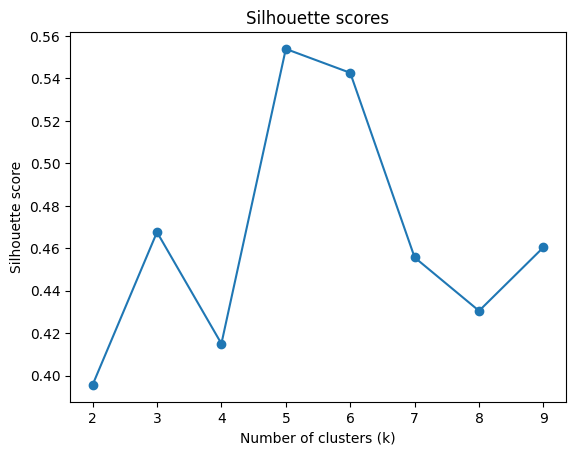

In [10]:
# Método del codo
# No funciona con K=1 porque no se puede calcular
# la separabilidad con otro cluster
silhouettes = []
for i in range(2, 10):
    km = KMeans(n_clusters = i, init='k-means++')
    km.fit(X)
    silhouettes.append(silhouette_score(X, km.labels_))
plt.plot(range(2,10), silhouettes, marker='o')
plt.title('Silhouette scores')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.show()

Según el Silhouette Score la mejor solución es KMeans con $k=5$.

### Ejercicio en clase
Evalua las siguientes soluciones de clustering con KMeans segun inercia y silhouette score. ¿Cuál es la mejor?

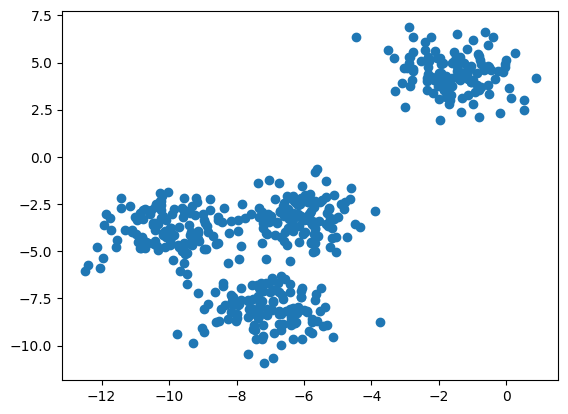

In [11]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, n_features=2, centers=4,
    cluster_std=1, center_box=(-10.0, 10.0),
    shuffle=True, random_state=1)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [13]:
#Evalua las siguientes soluciones de clustering con KMeans segun inercia y silhouette score. ¿Cuál es la mejor?

# 1. KMeans con 2 clusters

km2 = KMeans(n_clusters=2, init='k-means++')
y_kmeans2 = km2.fit_predict(X)
print(km2.inertia_)

silhouette_score(X, km2.labels_)


3735.4056749295637


0.7049787496083262